# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import sklearn.metrics as metrics # confusion matrix stuff
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
# cannot import "root_mean_squared_error"

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


- utlimately, it is to curate and prepare the data that will train the model
- Discover patterns and correlationships between potential predictor variables
- Cleaning and encoding that data where necessary
- identify if the data has missing values or outliers and apply appropriate strategies to handle them
- identify duplicates and apply appropriate strategies to handle them
- transforming data where necessary 
- validate data (ensure they meet model assumptions and that they're appropriate for modeling the objective)

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [3]:
# Start with `.shape` and `.info()`
df_orig = df0.copy()
print(df0.shape)
print(df0.info())

(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [4]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
print(f'missing values: \n{df0.isna().sum()}')
print(f'missing rows: {df0.isna().any(axis=1).sum()}')
print(f'missing cols: {df0.isna().any(axis=0).sum()}')

missing values: 
Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64
missing rows: 0
missing cols: 0


Use `.describe()`.

In [5]:
df0.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [6]:
# Use .describe()
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [7]:
df0.describe(include='object')

,tpep_pickup_datetime,tpep_dropoff_datetime,store_and_fwd_flag
count,22699,22699,22699
unique,22687,22688,2
top,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,N
freq,2,2,22600


In [8]:
df0['store_and_fwd_flag'].value_counts()

N    22600
Y       99
Name: store_and_fwd_flag, dtype: int64

### Task 2b. Convert pickup & dropoff columns to datetime


In [9]:
# Check the format of the data
print(df0['tpep_pickup_datetime'].dtype)
print(df0['tpep_dropoff_datetime'].dtype)

object
object


In [10]:
# Convert datetime columns to datetime
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df0.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [11]:
df0['tpep_pickup_datetime'].iloc[0] # before: Timestamp('2017-03-25 08:55:43')

Timestamp('2017-03-25 08:55:43')

In [12]:
# Create `duration` column
timedelta = (df0['tpep_dropoff_datetime'].iloc[0] - df0['tpep_pickup_datetime'].iloc[0])/np.timedelta64(1,'m')
timedelta

14.066666666666666

In [13]:
# Create `duration` column
timedelta = (df0['tpep_dropoff_datetime'].iloc[0] - df0['tpep_pickup_datetime'].iloc[0]).total_seconds()/60
timedelta

14.066666666666666

In [14]:
df0['duration'] = (df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime']).dt.total_seconds()/60

In [15]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [16]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [17]:
df0.describe().loc[:,['trip_distance', 'fare_amount', 'duration']]

,trip_distance,fare_amount,duration
count,22699.000000,22699.000000,22699.000000
mean,2.913313,13.026629,17.013777
std,3.653171,13.243791,61.996482
min,0.000000,-120.000000,-16.983333
25%,0.990000,6.500000,6.650000
50%,1.610000,9.500000,11.183333
75%,3.060000,14.500000,18.383333
max,33.960000,999.990000,1439.550000


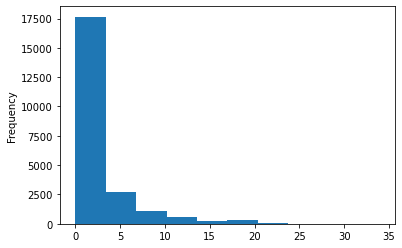

In [18]:
df0['trip_distance'].plot.hist()
plt.show()

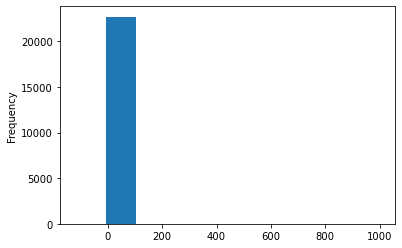

In [19]:
df0['fare_amount'].plot.hist()
plt.show()

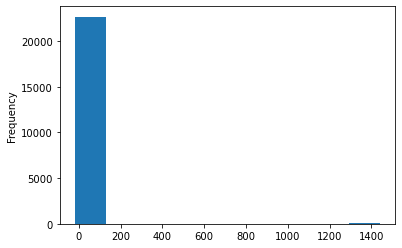

In [20]:
df0['duration'].plot.hist()
plt.show()

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:

'''pertinent columns with outliers: 
trip_distance, 
fare_amount, 
tip_amount (not as important), 
tolls_amount (not as important), 
total_amount (not as important), 
duration
'''

* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

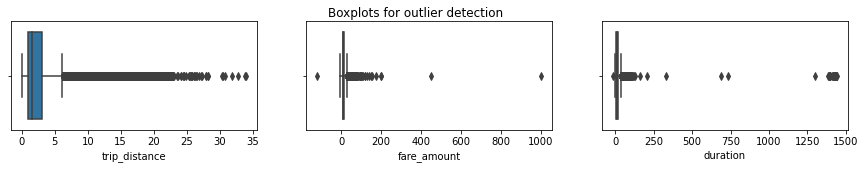

In [21]:
### YOUR CODE HERE ###
fig, axes = plt.subplots(1, 3, figsize=(15,2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0],x=df0['trip_distance'])
sns.boxplot(ax=axes[1],x=df0['fare_amount'])
sns.boxplot(ax=axes[2],x=df0['duration'])
plt.show()



**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

1. All three variables have outliers (pretty badly)
2. They are believable for taxi rides averaging 1 - 3 miles in NYC.  The 33 miles ride is definitely an outlier.
3. Anything 0 or less does not make sense, we should probably resolve this.

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [22]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(df0['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [23]:
from collections import Counter
counter = Counter()
counter.update(df0['trip_distance'])
counter[0]
# sum(df['trip_distance']==0)

148

#### `fare_amount` outliers

In [24]:
### YOUR CODE HERE ###
sorted(set(df0['fare_amount']))[:10]

[-120.0, -4.5, -4.0, -3.5, -3.0, -2.5, 0.0, 0.01, 1.0, 2.5]

**Question:** What do you notice about the values in the `fare_amount` column?
- they are also high precision, and we have some values less than 0

Impute values less than $0 with `0`.

In [25]:
# Impute values less than $0 with 0
mask = df0['fare_amount'] < 0
df0.loc[mask, 'fare_amount'] = 0

In [26]:
### YOUR CODE HERE ###
sorted(set(df0['fare_amount']))[:10]

[0.0, 0.01, 1.0, 2.5, 3.0, 3.5, 4.0, 4.5, 4.8, 5.0]

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [27]:
### YOUR CODE HERE ###
def impute_outliers(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
  ### YOUR CODE HERE ###
    for col in column_list:
        # Reassign minimum to zero
        mask = df0[col] < 0
        df0.loc[mask, col] = 0
        ### YOUR CODE HERE ###
        q1 = df0[col].quantile(0.25)
        q3 = df0[col].quantile(0.75)
        iqr = q3 - q1
        print(f'iqr for {col}: {iqr}')

        # Calculate upper threshold
        ### YOUR CODE HERE ###
        upper_threshold = q3 + (iqr_factor * iqr)
        print(f'{col} outliers imputed with: {upper_threshold}')

        # Reassign values > threshold to threshold
        mask = df0[col] > upper_threshold
        df0.loc[mask, col] = upper_threshold

In [28]:
sorted(set(df0['fare_amount']))[:-10:-1]

[999.99, 450.0, 200.01, 200.0, 175.0, 152.0, 150.0, 140.0, 131.0]

In [29]:
impute_outliers(['fare_amount'],6) # iqr for fare_amount: 8.0

iqr for fare_amount: 8.0
fare_amount outliers imputed with: 62.5


In [30]:
sorted(set(df0['fare_amount']))[-10:][::-1]

[62.5, 62.0, 61.5, 61.0, 60.0, 59.5, 59.0, 58.5, 58.0, 57.5]

#### `duration` outliers


In [31]:
# Call .describe() for duration outliers
### YOUR CODE HERE ###
df0.describe().loc[['mean', 'min', 'max'],['duration']]

,duration
mean,17.013777
min,-16.983333
max,1439.550000


The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [32]:
# Impute a 0 for any negative values
sorted(set(df0['duration']))[:10]

[-16.983333333333334,
 0.0,
 0.016666666666666666,
 0.03333333333333333,
 0.05,
 0.06666666666666667,
 0.08333333333333333,
 0.1,
 0.11666666666666667,
 0.13333333333333333]

In [33]:
# Impute the high outliers
impute_outliers(['duration'], 6) # iqr for duration: 11.733333333333333

iqr for duration: 11.733333333333333
duration outliers imputed with: 88.78333333333333


In [34]:
sorted(set(df0['duration']))[:10]

[0.0,
 0.016666666666666666,
 0.03333333333333333,
 0.05,
 0.06666666666666667,
 0.08333333333333333,
 0.1,
 0.11666666666666667,
 0.13333333333333333,
 0.15]

In [35]:
sorted(set(df0['duration']))[-10:][::-1]

[88.78333333333333,
 87.95,
 87.88333333333334,
 87.8,
 87.28333333333333,
 87.15,
 86.96666666666667,
 86.95,
 86.83333333333333,
 85.91666666666667]

In [36]:
df0['duration'].describe()

count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64

### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [37]:
# Create `pickup_dropoff` column
df0[['PULocationID', 'DOLocationID']].head()
df0['pickup_dropoff'] = df0['PULocationID'].astype(str) +  ' ' + df0['DOLocationID'].astype(str)
# df0['PULocationID'].iloc[0].astype(str) +  ' ' + df0['DOLocationID'].iloc[0].astype(str)
df0['pickup_dropoff'].head()

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: pickup_dropoff, dtype: object

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [38]:
### YOUR CODE HERE ###
grouped = df0.groupby('pickup_dropoff')['trip_distance'].mean()
grouped.__class__
grouped_dict = grouped.to_dict()
for item in grouped_dict.items():
    print(item)
    break
[key for key in grouped_dict.keys() if key == 'trip_distance']

('1 1', 2.433333333333333)


[]

`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [39]:
# 1. Convert `grouped` to a dictionary
### YOUR CODE HERE ###

# 2. Reassign to only contain the inner dictionary
### YOUR CODE HERE ###

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [40]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df0['mean_distance'] = df0['pickup_dropoff'].copy() # '100 231'

# 2. Map `grouped_dict` to the `mean_distance` column
df0['mean_distance'] = df0['pickup_dropoff'].map(grouped_dict)

# Confirm that it worked
print(df0[['mean_distance']].head())
mask = (df0['PULocationID'] == 100) & (df0['DOLocationID'] == 231)
df0[mask][['mean_distance']].head()


   mean_distance
0       3.521667
1       3.108889
2       0.881429
3       3.700000
4       4.435000


,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [41]:
### YOUR CODE HERE ###

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped = df0.groupby('pickup_dropoff')['duration'].mean()
grouped_dict = grouped.to_dict()

df0['mean_duration'] = df0['pickup_dropoff'].copy()
df0['mean_duration'] = df0['mean_duration'].map(grouped_dict)

# Confirm that it worked
mask = (df0['PULocationID'] == 100) & (df0['DOLocationID'] == 231)
df0[mask][['mean_duration']].head()

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [42]:
# Create 'day' col
# df0['tpep_pickup_datetime'].iloc[0]
# dir(df0['tpep_pickup_datetime'].dt)
df0['day'] = df0['tpep_pickup_datetime'].dt.day_name().str.lower()


# Create 'month' col
### YOUR CODE HERE ###
df0['month'] = df0['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [43]:
df0['day'].value_counts()

friday       3413
thursday     3402
wednesday    3390
saturday     3367
tuesday      3198
sunday       2998
monday       2931
Name: day, dtype: int64

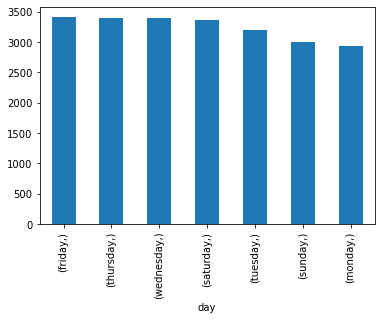

In [44]:
day_counts = df0[['day']].value_counts()
day_counts.plot.bar()
plt.show()

In [45]:
df0['month'].value_counts()

mar    2049
oct    2027
apr    2019
may    2013
jan    1997
jun    1964
dec    1863
nov    1843
feb    1769
sep    1734
aug    1724
jul    1697
Name: month, dtype: int64

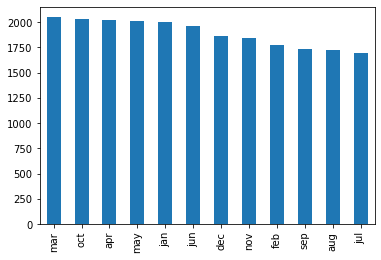

In [46]:
month_counts = df0['month'].value_counts()
month_counts.plot.bar()

In [47]:
df0.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
duration                        float64
pickup_dropoff                   object
mean_distance                   float64
mean_duration                   float64
day                              object
month                            object
dtype: object

In [48]:
sample = df0['tpep_pickup_datetime'].iloc[0]
dir(sample)

['__add__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_date_repr',
 '_freq',
 '_freqstr',
 '_repr_base',
 '_round',
 '_set_freq',
 '_short_repr',
 '_time_repr',
 'asm8',
 'astimezone',
 'ceil',
 'combine',
 'ctime',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'dst',
 'floor',
 'fold',
 'freq',
 'freqstr',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_q

In [49]:
# Create 'rush_hour' col
### YOUR CODE HERE ###
weekday_mask = ~df0['day'].isin(['saturday', 'sunday'])
print(weekday_mask.shape)
# Either from 06:00–10:00 or from 16:00–20:00
hours_mask = (df0['tpep_pickup_datetime'].dt.hour >= 6) & (df0['tpep_pickup_datetime'].dt.hour <= 10) | (df0['tpep_pickup_datetime'].dt.hour >= 16) & (df0['tpep_pickup_datetime'].dt.hour <= 20)
print(hours_mask.shape)

rush_hour_mask = weekday_mask & hours_mask
print(rush_hour_mask.shape)
print(rush_hour_mask.head())

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
# ### YOUR CODE HERE ###
df0['rush_hour'] = rush_hour_mask.map({True: 1, False:0})
df0['rush_hour'].head()

(22699,)
(22699,)
(22699,)
0    False
1    False
2     True
3    False
4    False
dtype: bool


0    0
1    0
2    1
3    0
4    0
Name: rush_hour, dtype: int64

In [50]:
### YOUR CODE HERE ###

In [51]:
# Apply the `rush_hourizer()` function to the new column
### YOUR CODE HERE ###

### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

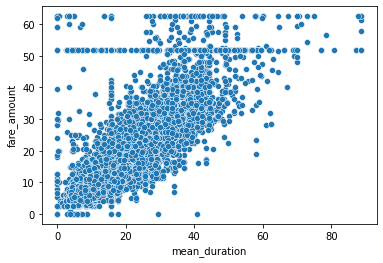

In [52]:
# Create a scatterplot to visualize the relationship between variables of interest
### YOUR CODE HERE ###
# mean_distance, mean_duration, fare_amount
sns.scatterplot(data=df0, x='mean_duration', y='fare_amount')
plt.show()


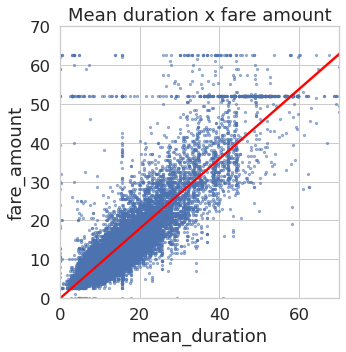

In [53]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid', font_scale=1.5)
plt.figure(figsize=(5,5))
# f = plt.figure()
# f.set_figwidth(5)
# f.set_figheight(5)
sns.regplot(data=df0, x='mean_duration', y='fare_amount',
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [54]:
mask = df0['fare_amount'] == 52.0
check_subset = df0[mask]
print(check_subset.shape)
check_subset.head(10)

(514, 25)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,mar,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,sep,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,apr,0


Examine the first 30 of these trips.

In [55]:
check_subset.describe(include='object')

,store_and_fwd_flag,pickup_dropoff,day,month
count,514,514,514,514
unique,2,150,7,12
top,N,132 230,monday,oct
freq,511,25,83,53


In [56]:
# Set pandas to display all columns
check_subset.head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,mar,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,sep,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,apr,0


**Question:** What do you notice about the first 30 trips?

- Almost all of them involve location 132 (whether pickup or dropoff)
- They all have the same ratecodeid and store_and_fwd_flag
- Varying days of the week and months and trip distances (well represented)
- Data dictionary says that 2 is for JFK

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [57]:
### YOUR CODE HERE ###
df0.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
duration                        float64
pickup_dropoff                   object
mean_distance                   float64
mean_duration                   float64
day                              object
month                            object
rush_hour                         int64


In [58]:
### YOUR CODE HERE ###
df2 = df0[['VendorID', 'passenger_count', 'mean_distance', 'mean_duration', 'fare_amount', 'rush_hour']]
print(df2.shape)
df2.head()


(22699, 6)


,VendorID,passenger_count,mean_distance,mean_duration,fare_amount,rush_hour
0,2,6,3.521667,22.847222,13.0,0
1,1,1,3.108889,24.470370,16.0,0
2,1,1,0.881429,7.250000,6.5,1
3,2,1,3.700000,30.250000,20.5,0
4,2,1,4.435000,14.616667,16.5,0


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

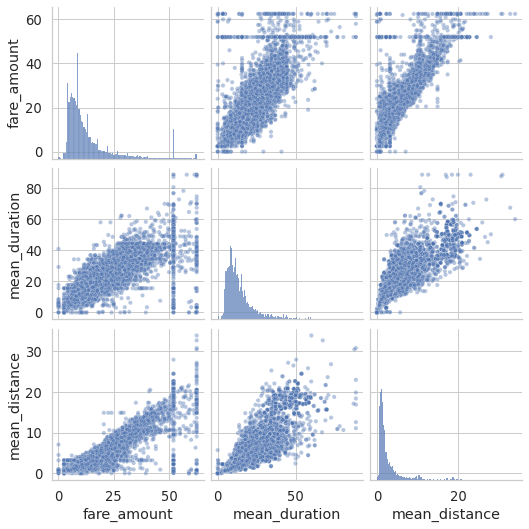

In [59]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.set(style='whitegrid', font_scale=1.2)
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']], plot_kws={'alpha':0.4, 'size':3})
plt.show()

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [60]:
# Correlation matrix to help determine most correlated variables
df2.corr(method='pearson') # kendall, spearman

,VendorID,passenger_count,mean_distance,mean_duration,fare_amount,rush_hour
VendorID,1.000000,0.266463,0.004741,0.001876,0.001045,-0.000752
passenger_count,0.266463,1.000000,0.013428,0.015852,0.014942,-0.024283
mean_distance,0.004741,0.013428,1.000000,0.874864,0.910185,-0.046794
mean_duration,0.001876,0.015852,0.874864,1.000000,0.859105,-0.027499
fare_amount,0.001045,0.014942,0.910185,0.859105,1.000000,-0.025901
rush_hour,-0.000752,-0.024283,-0.046794,-0.027499,-0.025901,1.000000


##### Spearman: Measures monotonic relationships (ranks instead of actual values).
##### Kendall: Measures ordinal relationships, better for small datasets or tied ranks.

- mean_distance and mean_duration 0.87
- mean_distance and fare_amount 0.91
- fare_amount and mean_duration 0.85

* these variables unfortunately are indicating really high correlation with each other.

Visualize a correlation heatmap of the data.

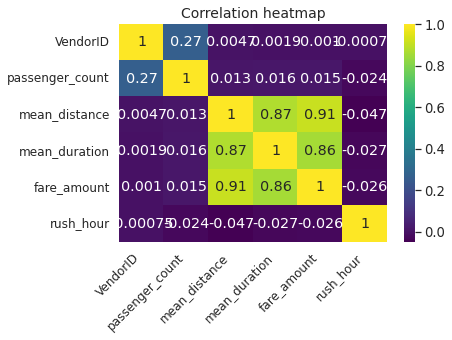

In [183]:
# Create correlation heatmap
plt.figure(figsize=(6,4))
ax = sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='viridis') # reds, blues
plt.xticks(rotation = 45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation heatmap',
          fontsize=14)
plt.show()

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Try modeling with both variables even though they are correlated.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [62]:
### YOUR CODE HERE ###
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   mean_distance    22699 non-null  float64
 3   mean_duration    22699 non-null  float64
 4   fare_amount      22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [122]:
# Remove the target column from the features
# X = df2.drop(columns='fare_amount')
### YOUR CODE HERE ###
X = df2.drop(columns=['fare_amount'])

# Set y variable
### YOUR CODE HERE ###
y = df2[['fare_amount']]

# Display first few rows
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


In [134]:
print(y.shape)
y.head()

(22699, 1)


,fare_amount
0,13.0
1,16.0
2,6.5
3,20.5
4,16.5


### Task 8b. Pre-process data


Dummy encode categorical variables

In [135]:
# Convert VendorID to string
print(X['VendorID'].unique())
print(X.dtypes)
X['VendorID'] = X['VendorID'].astype(str)
print(X.dtypes)

# Get dummies
X['VendorID'] = pd.get_dummies(X['VendorID'], drop_first = True)
X.dtypes
# X = pd.get_dummies(X, drop_first=True)
# X.head()

[1 0]
VendorID             uint8
passenger_count      int64
mean_distance      float64
mean_duration      float64
rush_hour            int64
dtype: object
VendorID            object
passenger_count      int64
mean_distance      float64
mean_duration      float64
rush_hour            int64
dtype: object


VendorID             uint8
passenger_count      int64
mean_distance      float64
mean_duration      float64
rush_hour            int64
dtype: object

In [136]:
X.head(2)

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,1,6,3.521667,22.847222,0
1,0,1,3.108889,24.470370,0


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [137]:
# Create training and testing sets
#### YOUR CODE HERE ####
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18159, 5)
(4540, 5)
(18159, 1)
(4540, 1)


### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [138]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)
# [-0.50301524  0.8694684   0.17616665 -0.77153979  0.89286563]

X_train scaled: [[ 0.89286563 -0.50301524  0.8694684   0.17616665 -0.77153979]
 [ 0.89286563 -0.50301524 -0.60011281 -0.69829589  1.29610943]
 [-1.11998936  0.27331093 -0.47829156 -0.57301906 -0.77153979]
 ...
 [-1.11998936 -0.50301524 -0.45121122 -0.6788917  -0.77153979]
 [-1.11998936 -0.50301524 -0.58944763 -0.85743597  1.29610943]
 [ 0.89286563  1.82596329  0.83673851  1.13212101 -0.77153979]]


### Fit the model

Instantiate your model and fit it to the training data.

In [139]:
# Fit your model to the training data
### YOUR CODE HERE ###
print(X_train_scaled.shape)
print(y_train.shape)
model = LinearRegression()
model.fit(X_train_scaled,y_train)

(18159, 5)
(18159, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [129]:
# Evaluate the model performance on the training data
### YOUR CODE HERE ###
y_pred_train = model.predict(X_train_scaled)
model.score(X_train_scaled)
print(f'r2: {r2_score(y_train, y_pred_train)}')
print(f'mean absolute: {mean_absolute_error(y_train, y_pred_train)}')
print(f'mean square: {mean_squared_error(y_train, y_pred_train)}')
print(f'root mean square: {np.sqrt(mean_squared_error(y_train, y_pred_train))}')

mean absolute: 2.186238565532888
r2: 0.839866631223281
mean square: 17.887144535024103
root mean square: 4.229319630274366


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [130]:
# Scale the X_test data
### YOUR CODE HERE ###
X_test_scaled = scaler.transform(X_test)

In [196]:
# Evaluate the model performance on the testing data
### YOUR CODE HERE ###
r_sq_test = model.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
sqrt_mse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'r2: {r2_score(y_test, y_pred_test)}')
print(f'mean absolute: {mean_absolute_error(y_test, y_pred_test)}')
print(f'mean square: {mean_squared_error(y_test, y_pred_test)}')
print(f'root mean square: {np.sqrt(mean_squared_error(y_test, y_pred_test))}')
results_df = pd.DataFrame({
'r-square': [r2],
'MAE': [mae],
'MSE': [mse],
'RMSE': [sqrt_mse]}
)
results_df

Coefficient of determination: 0.868246979045672
r2: 0.868246979045672
mean absolute: 2.1336582291943444
mean square: 14.327692251527623
root mean square: 3.785193819545787


,r-square,MAE,MSE,RMSE
0,0.868247,2.133658,14.327692,3.785194


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [149]:
# Create a `results` dataframe
### YOUR CODE HERE ###
print(y_test.shape)
print(y_test['fare_amount'].shape)
print(y_pred_test.shape)
actual, predicted = y_test['fare_amount'], y_pred_test.ravel()
# 2D array shape [[10], [20], [30]]
# 1D array shape (or series) [10, 20, 30] 
results = pd.DataFrame({
    'actual': actual,
    'predicted': predicted
})
results['residuals'] = results['actual'] - results['predicted']
results.head()

(4540, 1)
(4540,)
(4540, 1)


,actual,predicted,residuals
5818,14.0,12.333763,1.666237
18134,28.0,16.542899,11.457101
4655,5.5,6.703877,-1.203877
7378,15.5,16.205251,-0.705251
13914,9.5,10.514265,-1.014265


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

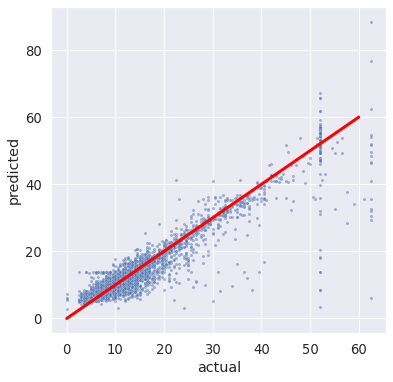

In [150]:
# Create a scatterplot to visualize `predicted` over `actual`
# sns.scatterplots use data, x, y, alpha, s, ax as parameters
fig, ax = plt.subplots(figsize=(6,6))
sns.set_style('whitegrid')
sns.scatterplot(
data = results,
x = 'actual',
y = 'predicted',
alpha = 0.5,
s=10,
ax=ax
)
plt.plot([0,60],[0,60], c='red', linewidth=3)
plt.show()

Visualize the distribution of the `residuals` using a histogram.

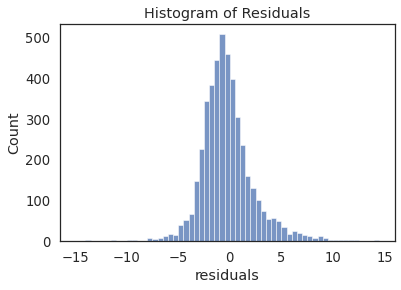

In [151]:
# Visualize the distribution of the `residuals`
sns.set_style('white') # white, dark, whitegrid
sns.histplot(results['residuals'], bins=np.arange(-15,15,0.5))
plt.title('Histogram of Residuals')
plt.show()



In [152]:
# Calculate residual mean
residual_mean = results['residuals'].mean()
print(f'residual_mean: {residual_mean}')

residual_mean: -0.015181994717796875


Create a scatterplot of `residuals` over `predicted`.

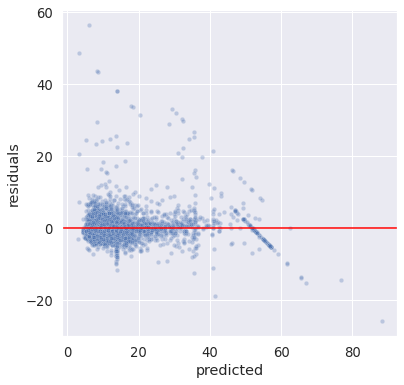

In [153]:
# Create a scatterplot of `residuals` over `predicted`
sns.set_style('darkgrid') # white, dark, whitegrid, darkgrid, ticks
fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(
data=results,
x='predicted',
y='residuals',
alpha=0.3,
s=20,
ax=ax
)
plt.axhline(0, c='red')
plt.show()

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [168]:
# Output the model's coefficients
print(X.shape)
print(model.coef_)
coefficients = pd.DataFrame(model.coef_, columns=X.columns)
# coefficients = pd.DataFrame(model.coef_, X.columns)
coefficients

(22699, 5)
[[-0.05461146  0.0315442   7.13575767  2.81158282  0.12149088]]


,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,-0.054611,0.031544,7.135758,2.811583,0.121491


What do these coefficients mean? How should they be interpreted?

- The betas revealed that the feature with the highest weight in explaining the response is mean_distance with \\$7.135758. However, since we standardized this feature, it's not 1 to 1.  This doesn't mean for every mile you can estimate \\$7.14 fare_amount on average.  We would have to unscale the data to get the actual miles.  The correct to interpret this then is "controlling for other variables, for every +1 change in standard deviation (because we're working with scaled data), the fare amount increases by a mean of $7.13."

### How to unscale the data

In [162]:
print(f"std dev: {X_train['mean_distance'].std()}")
print(coefficients['mean_distance'].ravel()/X_train['mean_distance'].std())

std dev: 3.574812975256415
[1.99612056]


#### Interpretation of the unscaled results
- for every 3.57 miiles, controlling for other variables, the fare mount increases by a mean of \\$7.13
- for every 1 mile, controlling for other variables, the fare amount increases by a mean of \\$2.00

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?



2. What results can be presented from this notebook?



==> ENTER YOUR RESPONSE HERE 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 